In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
path = "/content/images7/"

#Autoregressive Integrated Moving Average(ARIMA) Model

* ARIMA(p, d, q)
* combination of the AR(p) and MA(q) processes, but in terms of the differenced series
* p - order of the AR(p) process
* d - order of integration
* q - order of the MA(q) process
* Integration is the reverse of differencing, and the order of integration d is equal to the number of times the series has been differenced to be rendered stationary

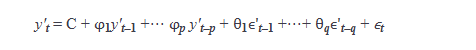

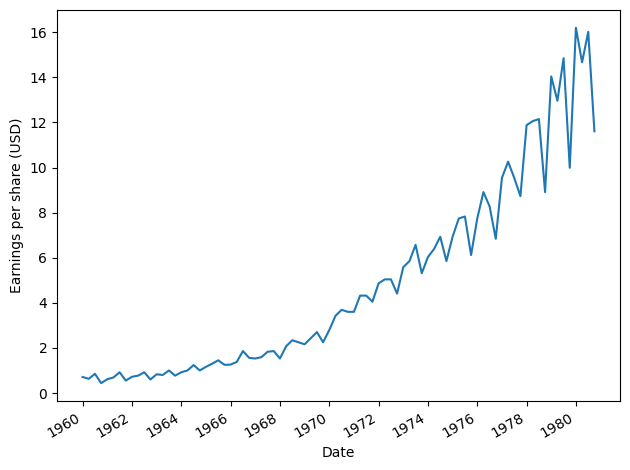

In [4]:
df = pd.read_csv("/content/jj.csv")

fig, ax = plt.subplots()

ax.plot(df.date, df.data)
ax.set_xlabel("Date")
ax.set_ylabel("Earnings per share (USD)")

plt.xticks(np.arange(0, 81, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig(path+"ts1.png")

In [5]:
df.head()

,date,data
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-02,0.85
3,1960-10-01,0.44
4,1961-01-01,0.61


In [6]:
from statsmodels.tsa.stattools import adfuller

ad_fuller_result = adfuller(df["data"])

print(f"ADF Statistic: {ad_fuller_result[0]}")
print(f"p-value: {ad_fuller_result[1]}")


ADF Statistic: 2.7420165734574744
p-value: 1.0


In [7]:
eps_diff = np.diff(df["data"], n=1)

ad_fuller_result = adfuller(eps_diff)

print(f"ADF Statistic: {ad_fuller_result[0]}")
print(f"p-value: {ad_fuller_result[1]}")

ADF Statistic: -0.40740976363804615
p-value: 0.9088542416911305


In [8]:
eps_diff2 = np.diff(eps_diff, n=1)

ad_fuller_result = adfuller(eps_diff2)

print(f"ADF Statistic: {ad_fuller_result[0]}")
print(f"p-value: {ad_fuller_result[1]}")

ADF Statistic: -3.585162874793155
p-value: 0.006051099869603682


In [9]:
from typing import Union
from tqdm import tqdm_notebook
from statsmodels.tsa.statespace.sarimax import SARIMAX

def optimize_ARIMA(endog: Union[pd.Series, list], order_list: list, d: int) -> pd.DataFrame:
    results = []

    for order in tqdm_notebook(order_list):
        try:
            model = SARIMAX(endog, order=(order[0], d, order[1]), simple_differencing=False).fit(disp=False)
        except:
            continue

        aic = model.aic
        results.append([order, aic])

    result_df = pd.DataFrame(results)
    result_df.columns = ["(p,q)", "AIC"]

    result_df = result_df.sort_values(by="AIC", ascending=True).reset_index(drop=True)

    return result_df

In [10]:
from itertools import product

ps = range(0, 4, 1)
qs = range(0, 4, 1)
d = 2

order_list = list(product(ps, qs))

In [11]:
train = df.data[:-4]

result_df = optimize_ARIMA(train, order_list, d)
result_df

<ipython-input-9-30ad09997434>:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for order in tqdm_notebook(order_list):


  0%|          | 0/16 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: Conve

,"(p,q)",AIC
0,"(3, 3)",115.266637
1,"(3, 1)",115.624980
2,"(3, 2)",115.672007
3,"(3, 0)",154.430625
4,"(0, 3)",194.654716
5,"(0, 2)",209.274868
6,"(2, 3)",220.666965
7,"(1, 3)",228.267730
8,"(1, 2)",228.935782
9,"(2, 2)",229.974691


In [17]:
model = SARIMAX(train, order=(3,2,1), simple_differencing=False)
model_fit = model.fit(disp=False)
print(model_fit.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                               SARIMAX Results                                
Dep. Variable:                   data   No. Observations:                   80
Model:               SARIMAX(3, 2, 1)   Log Likelihood                 -52.812
Date:                Sun, 16 Mar 2025   AIC                            115.625
Time:                        05:53:56   BIC                            127.409
Sample:                             0   HQIC                           120.342
                                 - 80                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9956      0.029    -34.361      0.000      -1.052      -0.939
ar.L2         -0.9631      0.035    -27.389      0.000      -1.032      -0.894
ar.L3         -0.9589      0.032    -30.240      0.0

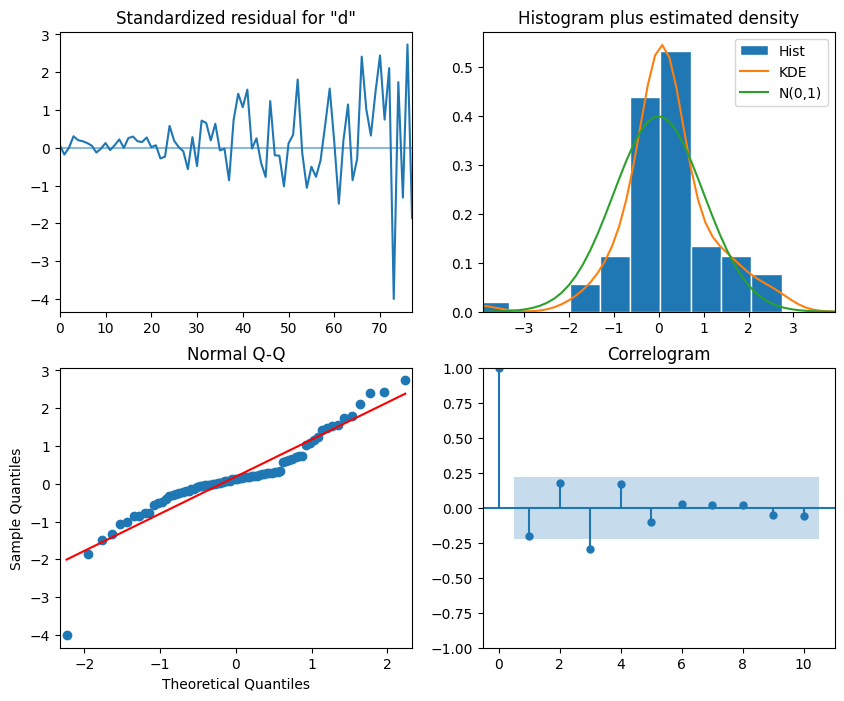

In [18]:
model_fit.plot_diagnostics(figsize=(10, 8));
plt.savefig(path+"ts2.png")

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                   data   No. Observations:                   80
Model:               SARIMAX(3, 2, 3)   Log Likelihood                 -50.633
Date:                Sun, 16 Mar 2025   AIC                            115.267
Time:                        05:58:37   BIC                            131.764
Sample:                             0   HQIC                           121.871
                                 - 80                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9994      0.037    -26.764      0.000      -1.073      -0.926
ar.L2         -0.9882      0.040    -25.002      0.000      -1.066      -0.911
ar.L3         -0.9758      0.026    -37.598      0.0

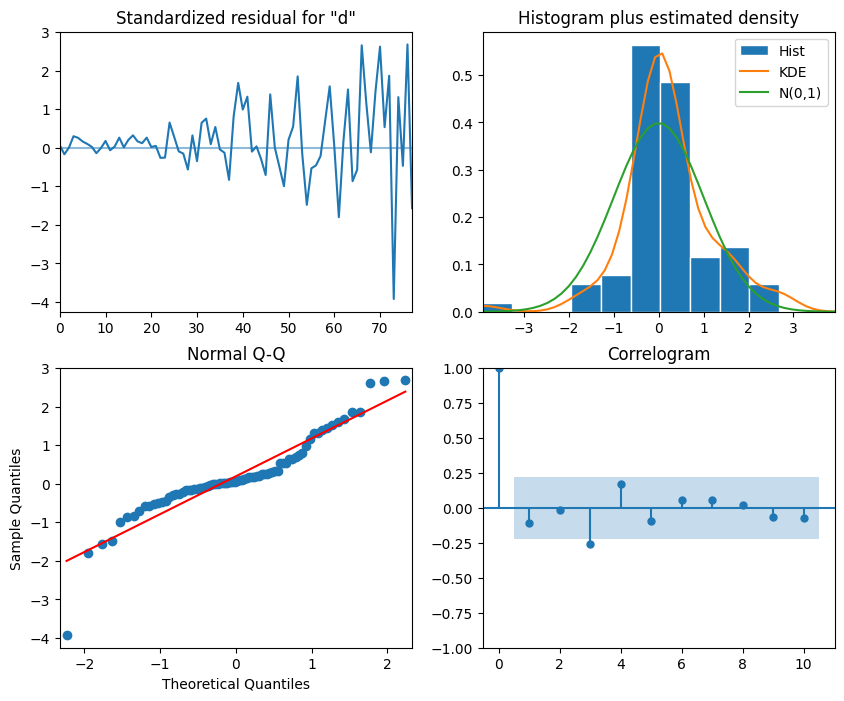

In [23]:
model1 = SARIMAX(train, order=(3,2,3), simple_differencing=False)
model_fit1 = model1.fit(disp=False)
print(model_fit1.summary())
model_fit1.plot_diagnostics(figsize=(10, 8));
plt.savefig(path+"ts2.png")

In [22]:
from statsmodels.stats.diagnostic import acorr_ljungbox

residuals = model_fit1.resid

result = acorr_ljungbox(residuals, np.arange(1, 11, 1))

print(result)

      lb_stat  lb_pvalue
1    1.652020   0.198684
2    1.654544   0.437241
3    7.276173   0.063597
4    9.231226   0.055573
5    9.853425   0.079497
6   10.097125   0.120621
7   10.346926   0.169751
8   10.379005   0.239426
9   10.721222   0.295303
10  11.159917   0.345196


In [24]:
test = df.iloc[-4:]
test["naive_seasonal"] = df["data"].iloc[76:80].values

<ipython-input-24-cb443d1f000c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["naive_seasonal"] = df["data"].iloc[76:80].values


In [26]:
ARIMA_pred = model_fit1.get_prediction(80, 83).predicted_mean
test["ARIMA_pred"] = ARIMA_pred

test

<ipython-input-26-ef71782107c7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["ARIMA_pred"] = ARIMA_pred


,date,data,naive_seasonal,ARIMA_pred
80,1980-01-01,16.20,14.04,15.858693
81,1980-04-01,14.67,12.96,14.381508
82,1980-07-02,16.02,14.85,16.365509
83,1980-10-01,11.61,9.99,11.680906


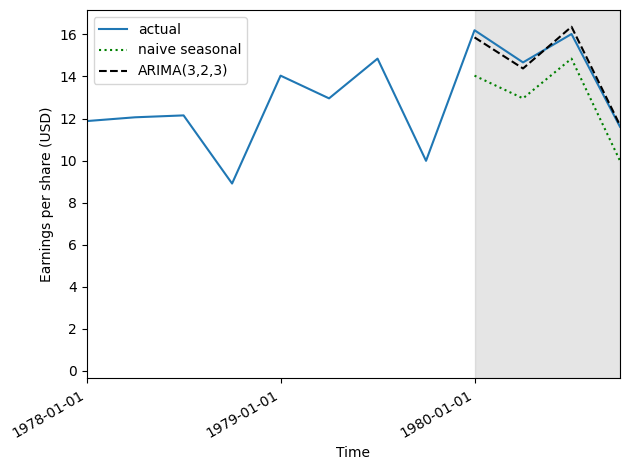

In [33]:
fig, ax = plt.subplots()

ax.plot(df["data"], label="actual")
ax.plot(test["naive_seasonal"], "g:", label="naive seasonal")
ax.plot(test["ARIMA_pred"], "k--", label="ARIMA(3,2,3)")
ax.legend(loc="best")
ax.set_xlabel("Time")
ax.set_ylabel("Earnings per share (USD)")

ax.axvspan(80, 83, color="grey", alpha=0.2)

ax.set_xlim(72, 83)

plt.xticks(
    [72,76,80],
    ["1978-01-01","1979-01-01","1980-01-01"]
)

fig.autofmt_xdate()
fig.tight_layout()

plt.savefig(path+"ts3.png")


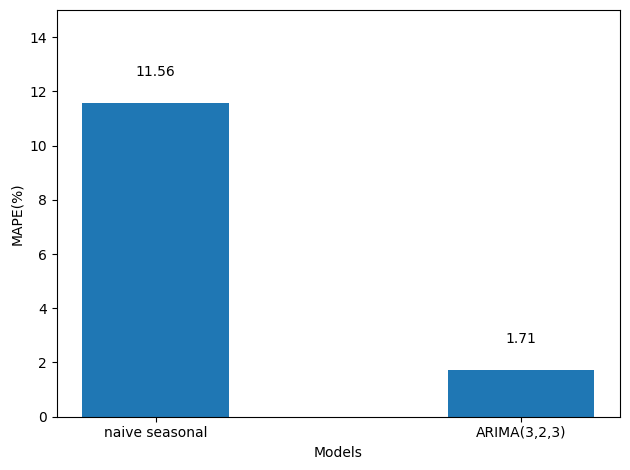

In [38]:
from sklearn.metrics import mean_absolute_error

def mape(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred) / y_true) * 100

mape_naive_seasonal = mape(test["data"], test["naive_seasonal"])
mape_ARIMA = mape(test["data"], test["ARIMA_pred"])

fig, ax = plt.subplots()

x = ["naive seasonal", "ARIMA(3,2,3)"]
y = [mape_naive_seasonal, mape_ARIMA]

ax.bar(x, y, width=0.4)
ax.set_xlabel("Models")
ax.set_ylabel("MAPE(%)")
ax.set_ylim(0, 15)

for index, value in enumerate(y):
    plt.text(x=index, y=value+1, s=str(round(value, 2)), ha="center")

plt.tight_layout()

plt.savefig(path+"ts4.png")

#ARIMA(p,d,q) Model on Widget_Sales dataset

In [40]:
df_ws = pd.read_csv("/content/widget_sales.csv")
df_ws.head()

,widget_sales
0,50.496714
1,50.805493
2,51.477758
3,53.542228
4,54.873108


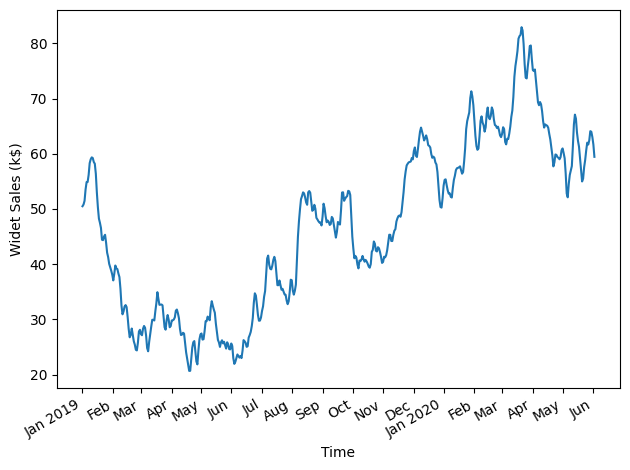

In [42]:
fig, ax = plt.subplots()

ax.plot(df_ws["widget_sales"])
ax.set_xlabel("Time")
ax.set_ylabel("Widet Sales (k$)")

plt.xticks(
    [0, 30, 57, 87, 116, 145, 175, 204, 234, 264, 293, 323, 352, 382, 409, 439, 468, 498],
    ['Jan 2019', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan 2020', 'Feb', 'Mar', 'Apr', 'May', 'Jun']
)

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig(path+"ts5.png")

In [44]:
ad_fuller_result = adfuller(df_ws["widget_sales"])

print(f"ADF Statistic: {ad_fuller_result[0]}")
print(f"p-value: {ad_fuller_result[1]}")

ADF Statistic: -1.5121662069359048
p-value: 0.5274845352272605


In [45]:
df_ws_diff = np.diff(df_ws["widget_sales"], n=1)

ad_fuller_result = adfuller(df_ws_diff)

print(f"ADF Statistic: {ad_fuller_result[0]}")
print(f"p-value: {ad_fuller_result[1]}")

ADF Statistic: -10.576657780341959
p-value: 7.076922818587193e-19


In [46]:
train = df_ws[:-50]
test = df_ws[-50:]

print(len(train))
print(len(test))

450
50


In [47]:
ps = range(0, 4, 1)
qs = range(0, 4, 1)
d = 1
order_list = list(product(ps, qs))

In [48]:
result_df = optimize_ARIMA(train, order_list, d)
result_df

<ipython-input-9-30ad09997434>:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for order in tqdm_notebook(order_list):


  0%|          | 0/16 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


,"(p,q)",AIC
0,"(3, 3)",1251.425849
1,"(0, 2)",1254.409302
2,"(2, 1)",1254.961827
3,"(0, 3)",1255.826822
4,"(3, 0)",1255.967595
5,"(1, 2)",1255.982548
6,"(1, 1)",1256.284513
7,"(3, 1)",1256.850863
8,"(2, 2)",1256.918179
9,"(1, 3)",1257.643258


In [50]:
model = SARIMAX(train, order=(3,1,3), simple_differencing=False)
model_fit = model.fit(disp=False)

print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:           widget_sales   No. Observations:                  450
Model:               SARIMAX(3, 1, 3)   Log Likelihood                -618.713
Date:                Sun, 16 Mar 2025   AIC                           1251.426
Time:                        06:52:21   BIC                           1280.175
Sample:                             0   HQIC                          1262.758
                                - 450                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3628      0.064     21.194      0.000       1.237       1.489
ar.L2         -1.3526      0.065    -20.846      0.000      -1.480      -1.225
ar.L3          0.3508      0.064      5.460      0.0

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


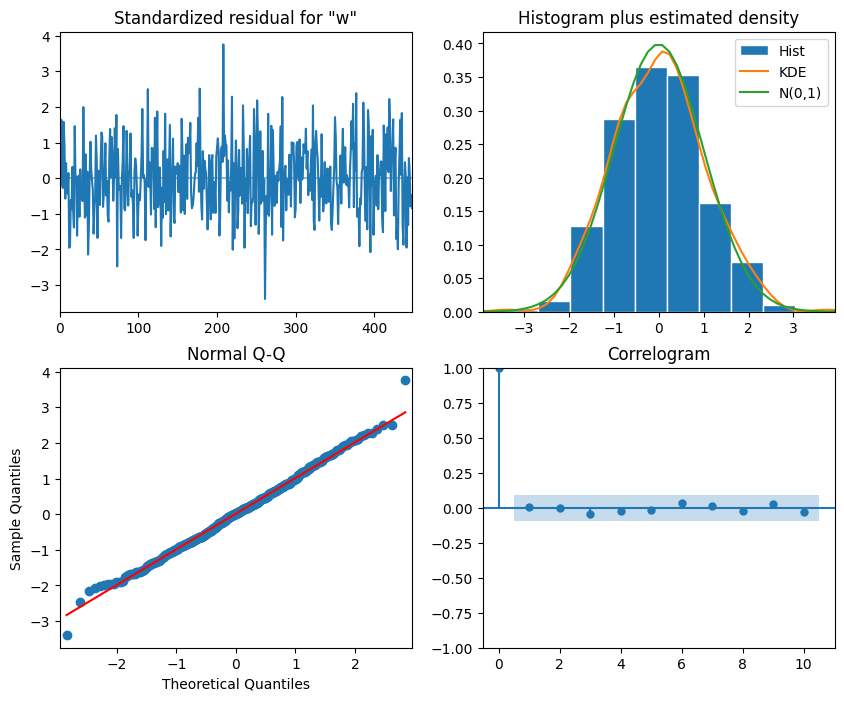

In [53]:
model_fit.plot_diagnostics(figsize=(10,8));
plt.savefig(path+"ts6.png")

In [55]:
residuals = model_fit.resid

results = acorr_ljungbox(residuals, np.arange(1,11,1))

print(results)

     lb_stat  lb_pvalue
1   0.017755   0.893996
2   0.045524   0.977495
3   0.241868   0.970563
4   0.263741   0.992033
5   0.284215   0.997929
6   0.704641   0.994390
7   0.828687   0.997140
8   0.903199   0.998789
9   0.953156   0.999538
10  1.003627   0.999825


In [56]:
def rolling_forecast(df: pd.DataFrame, train_len: int, horizon: int, window: int, method: str) -> str:
    total_len = train_len + horizon

    if method == "mean":
        pred_mean = []

        for i in range(train_len, total_len, window):
            mean = np.mean(df[:i].values)
            pred_mean.extend(mean for _ in range(window))

        return pred_mean

    elif method == "last":
        pred_last_value = []

        for i in range(train_len, total_len, window):
            last_value = df[:i].iloc[-1].values[0]
            pred_last_value.extend(last_value for _ in range(window))

        return pred_last_value

    elif method =="ARIMA":
        pred_ARIMA = []

        for i in range(train_len, total_len, window):
            model = SARIMAX(df[:i], order=(3,1,3))
            res = model.fit(dis=False)
            predictions = res.get_prediction(0, i+window-1)
            oos_pred = predictions.predicted_mean.iloc[-window:]
            pred_ARIMA.extend(oos_pred)

        return pred_ARIMA

In [58]:
TRAIN_LEN = len(train)
HORIZON = len(test)
WINDOW = 2

pred_mean = rolling_forecast(df_ws, TRAIN_LEN, HORIZON, WINDOW, "mean")
pred_last_value = rolling_forecast(df_ws, TRAIN_LEN, HORIZON, WINDOW, "last")
pred_ARIMA = rolling_forecast(df_ws, TRAIN_LEN, HORIZON, WINDOW, "ARIMA")

test.loc[:, "pred_mean"] = pred_mean
test.loc[:, "pred_last_value"] = pred_last_value
test.loc[:, "pred_ARIMA"] = pred_ARIMA

test.head()

/usr/local/lib/python3.11/dist-packages/statsmodels/base/optimizer.py:19: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: dis. After release 0.14, this will raise.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/optimizer.py:19: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed includ

,widget_sales,pred_mean,pred_last_value,pred_ARIMA
450,64.736005,45.472231,65.906136,64.811784
451,65.316972,45.472231,65.906136,64.718856
452,65.172070,45.558754,65.316972,66.241317
453,65.075506,45.558754,65.316972,66.606349
454,64.703173,45.644943,65.075506,64.993952


In [59]:
mean_mae = mape(test["widget_sales"], test["pred_mean"])
last_value = mape(test["widget_sales"], test["pred_last_value"])
ARIMA_mae = mape(test["widget_sales"], test["pred_ARIMA"])

print(mean_mae, last_value, ARIMA_mae)

23.264456456742828 3.0619382897094303 2.625112851070782


#ARIMA(p,d,q) model on Foot Traffic dataset

In [69]:
df_ft = pd.read_csv("/content/foot_traffic.csv")
df_ft.head()

,foot_traffic
0,500.496714
1,500.522366
2,501.426876
3,503.295990
4,504.132695


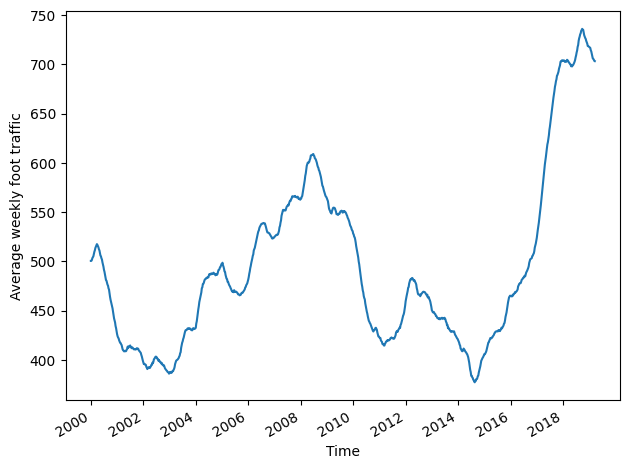

In [62]:
fig, ax = plt.subplots()

ax.plot(df_ft["foot_traffic"])
ax.set_xlabel("Time")
ax.set_ylabel("Average weekly foot traffic")

plt.xticks(np.arange(0, 1000, 104), np.arange(2000, 2020, 2))

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig(path+"ts7.png")

In [63]:
ad_fuller_result = adfuller(df_ft["foot_traffic"])

print(f"ADF Statistic: {ad_fuller_result[0]}")
print(f"p-value: {ad_fuller_result[1]}")

ADF Statistic: -1.1758885999240747
p-value: 0.683880891789619


In [64]:
df_ft_diff = np.diff(df_ft["foot_traffic"], n=1)

ad_fuller_result = adfuller(df_ft_diff)

print(f"ADF Statistic: {ad_fuller_result[0]}")
print(f"p-value: {ad_fuller_result[1]}")

ADF Statistic: -5.268231347422044
p-value: 6.369317654781239e-06


In [65]:
train = df_ft[:-52]
test = df_ft[-52:]

print(len(train))
print(len(test))

948
52


In [66]:
ps = range(0,4,1)
qs = range(0,4,1)
d = 1

order_list = list(product(ps, qs))

In [67]:
result_df = optimize_ARIMA(train, order_list, d)
result_df

<ipython-input-9-30ad09997434>:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for order in tqdm_notebook(order_list):


  0%|          | 0/16 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


,"(p,q)",AIC
0,"(1, 3)",2658.013441
1,"(3, 1)",2658.595081
2,"(3, 0)",2658.691777
3,"(2, 1)",2659.873751
4,"(3, 2)",2659.916852
5,"(2, 3)",2659.977855
6,"(3, 3)",2660.802094
7,"(2, 2)",2661.229924
8,"(2, 0)",2667.725827
9,"(1, 2)",2669.719835


In [68]:
model = SARIMAX(train, order=(3,1,0), simple_differencing=False)
model_fit = model.fit(disp=False)

print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:           foot_traffic   No. Observations:                  948
Model:               SARIMAX(3, 1, 0)   Log Likelihood               -1325.346
Date:                Sun, 16 Mar 2025   AIC                           2658.692
Time:                        07:21:32   BIC                           2678.105
Sample:                             0   HQIC                          2666.090
                                - 948                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3165      0.033      9.603      0.000       0.252       0.381
ar.L2          0.4802      0.031     15.510      0.000       0.419       0.541
ar.L3          0.1077      0.034      3.156      0.0

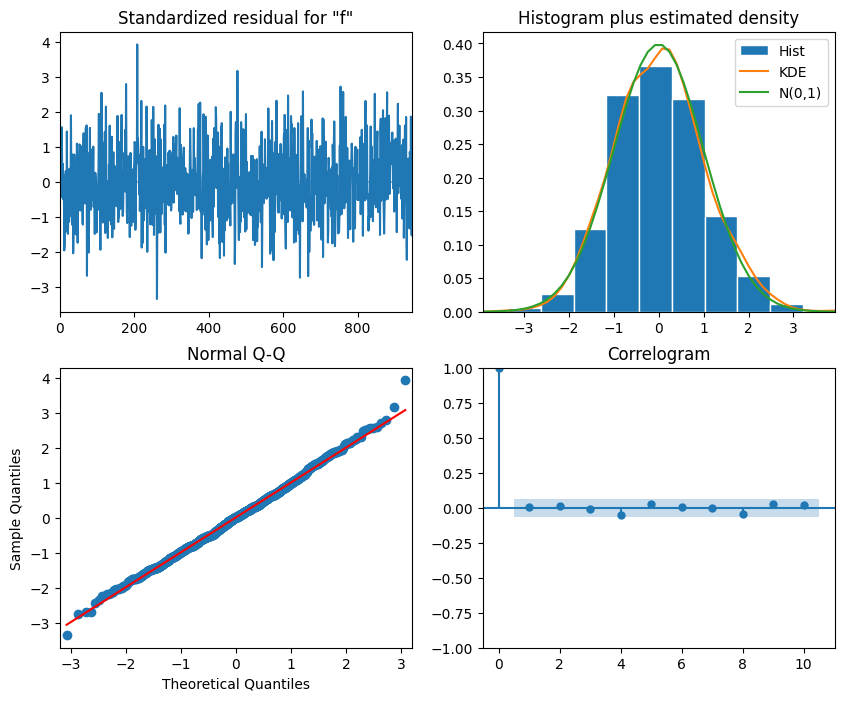

In [70]:
model_fit.plot_diagnostics(figsize=(10,8))
plt.savefig(path+"ts8.png")

In [71]:
residuals = model_fit.resid
results = acorr_ljungbox(residuals, np.arange(1, 11, 1))
print(results)

         lb_stat  lb_pvalue
1   5.283629e-07   0.999420
2   2.953440e-03   0.998524
3   1.120838e-02   0.999685
4   1.156744e-02   0.999983
5   1.171482e-02   0.999999
6   2.057364e-02   1.000000
7   2.283018e-02   1.000000
8   2.393564e-02   1.000000
9   2.501985e-02   1.000000
10  2.585504e-02   1.000000


In [72]:
def rolling_forecast(df: pd.DataFrame, train_len: int, horizon: int, window: int, method: str) -> str:
    total_len = train_len + horizon

    if method == "mean":
        pred_mean = []

        for i in range(train_len, total_len, window):
            mean = np.mean(df[:i].values)
            pred_mean.extend(mean for _ in range(window))

        return pred_mean

    elif method == "last":
        pred_last_value = []

        for i in range(train_len, total_len, window):
            last_value = df[:i].iloc[-1].values[0]
            pred_last_value.extend(last_value for _ in range(window))

        return pred_last_value

    elif method =="ARIMA":
        pred_ARIMA = []

        for i in range(train_len, total_len, window):
            model = SARIMAX(df[:i], order=(3,1,0))
            res = model.fit(dis=False)
            predictions = res.get_prediction(0, i+window-1)
            oos_pred = predictions.predicted_mean.iloc[-window:]
            pred_ARIMA.extend(oos_pred)

        return pred_ARIMA

In [74]:
TRAIN_LEN = len(train)
HORIZON = len(test)
WINDOW = 1

pred_mean = rolling_forecast(df_ft, TRAIN_LEN, HORIZON, WINDOW, "mean")
pred_last_value = rolling_forecast(df_ft, TRAIN_LEN, HORIZON, WINDOW, "last")
pred_ARIMA = rolling_forecast(df_ft, TRAIN_LEN, HORIZON, WINDOW, "ARIMA")

test.loc[:, "pred_mean"] = pred_mean
test.loc[:, "pred_last_value"] = pred_last_value
test.loc[:, "pred_ARIMA"] = pred_ARIMA

test.head()

/usr/local/lib/python3.11/dist-packages/statsmodels/base/optimizer.py:19: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: dis. After release 0.14, this will raise.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/base/optimizer.py:19: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: dis. After release 0.14, this will raise.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/base/optimizer.py:19: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect

,foot_traffic,pred_mean,pred_last_value,pred_ARIMA
948,701.686830,481.204906,702.463430,701.743717
949,701.112198,481.437237,701.686830,700.872282
950,700.221501,481.668474,701.112198,700.447460
951,699.937948,481.898288,700.221501,699.580032
952,698.107264,482.127321,699.937948,699.358669


In [75]:
mean_mae = mape(test["foot_traffic"], test["pred_mean"])
last_mae = mape(test["foot_traffic"], test["pred_last_value"])
ARIMA_mae = mape(test["foot_traffic"], test["pred_ARIMA"])

print(mean_mae, last_mae, ARIMA_mae)

31.855385985030587 0.20579341089242326 0.10496937734143388


#ARIMA(p,d,q) model on Bandwidth dataset

In [77]:
df_bw = pd.read_csv("/content/bandwidth.csv")
df_bw.head()

,hourly_bandwidth
0,1000.496714
1,1000.969408
2,1002.046019
3,1004.702118
4,1007.447816


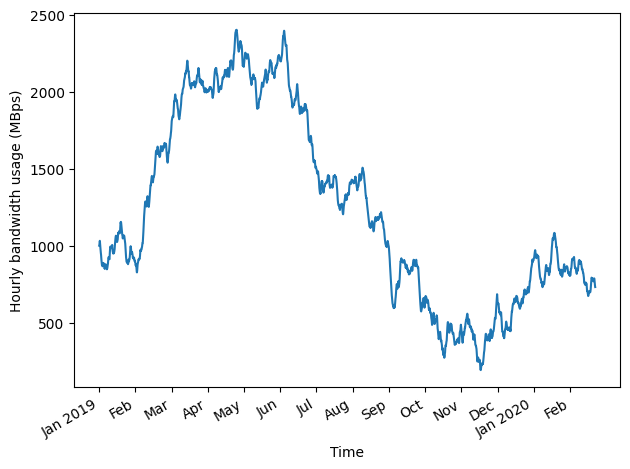

In [79]:
fig, ax = plt.subplots()

ax.plot(df_bw["hourly_bandwidth"])
ax.set_xlabel("Time")
ax.set_ylabel("Hourly bandwidth usage (MBps)")

plt.xticks(
    np.arange(0, 10000, 730),
    ['Jan 2019', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan 2020', 'Feb']
)

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig(path+"ts9.png")

In [80]:
ad_fuller_result = adfuller(df_bw["hourly_bandwidth"])

print(f"ADF Statistic: {ad_fuller_result[0]}")
print(f"p-value: {ad_fuller_result[1]}")

ADF Statistic: -0.8714653199452735
p-value: 0.7972240255014551


In [81]:
df_bw_diff = np.diff(df_bw["hourly_bandwidth"], n=1)

ad_fuller_result = adfuller(df_bw_diff)

print(f"ADF Statistic: {ad_fuller_result[0]}")
print(f"p-value: {ad_fuller_result[1]}")

ADF Statistic: -20.694853863789017
p-value: 0.0


In [82]:
train = df_bw[:-168]
test = df_bw[-168:]

print(len(train))
print(len(test))

9832
168


In [83]:
ps = range(0, 4, 1)
qs = range(0, 4, 1)
d = 1
order_list = list(product(ps, qs))

In [84]:
result_df = optimize_ARIMA(train, order_list, d)
result_df

<ipython-input-9-30ad09997434>:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for order in tqdm_notebook(order_list):


  0%|          | 0/16 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


,"(p,q)",AIC
0,"(3, 2)",27991.063157
1,"(2, 3)",27991.286794
2,"(2, 2)",27991.602936
3,"(3, 3)",27993.416226
4,"(1, 3)",28003.348864
5,"(1, 2)",28051.350913
6,"(3, 1)",28071.155049
7,"(3, 0)",28095.617602
8,"(2, 1)",28097.250206
9,"(2, 0)",28098.407146


In [85]:
model = SARIMAX(train, order=(2,1,2), simple_differencing=False)
model_fit = model.fit(disp=False)

print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:       hourly_bandwidth   No. Observations:                 9832
Model:               SARIMAX(2, 1, 2)   Log Likelihood              -13990.801
Date:                Sun, 16 Mar 2025   AIC                          27991.603
Time:                        07:40:21   BIC                          28027.569
Sample:                             0   HQIC                         28003.788
                               - 9832                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3486      0.052      6.765      0.000       0.248       0.450
ar.L2          0.4743      0.047     10.000      0.000       0.381       0.567
ma.L1          0.8667      0.050     17.249      0.0

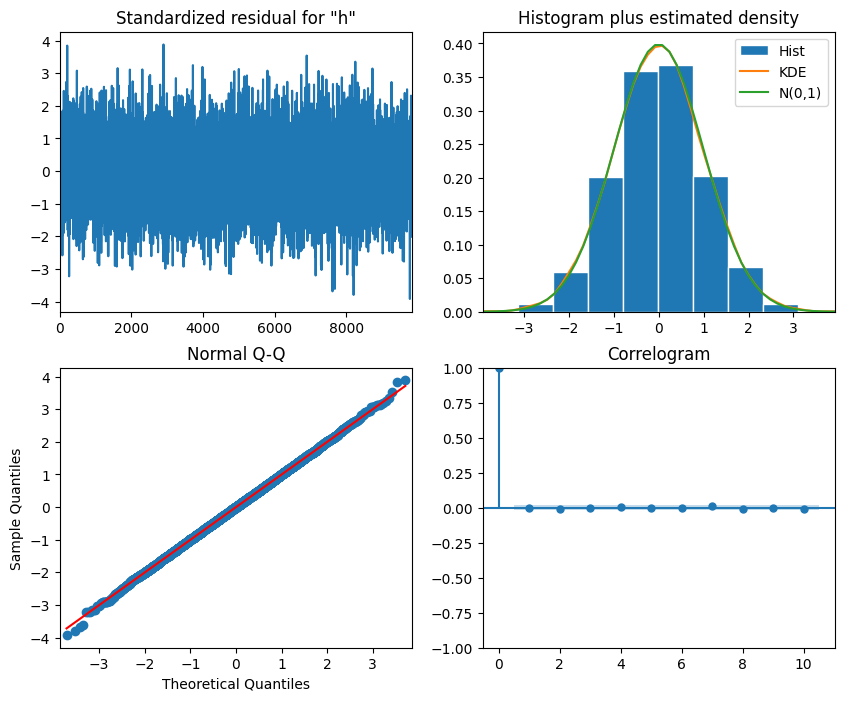

In [86]:
model_fit.plot_diagnostics(figsize=(10,8))
plt.savefig(path+"ts10.png")

In [88]:
residuals = model_fit.resid

results = acorr_ljungbox(residuals, np.arange(1, 11, 1))

print(results)

     lb_stat  lb_pvalue
1   0.001923   0.965020
2   0.005134   0.997436
3   0.025881   0.998901
4   0.025943   0.999917
5   0.026603   0.999994
6   0.049674   0.999997
7   0.057616   1.000000
8   0.060490   1.000000
9   0.063568   1.000000
10  0.065937   1.000000


In [89]:
def rolling_forecast(df: pd.DataFrame, train_len: int, horizon: int, window: int, method: str) -> str:
    total_len = train_len + horizon

    if method == "mean":
        pred_mean = []

        for i in range(train_len, total_len, window):
            mean = np.mean(df[:i].values)
            pred_mean.extend(mean for _ in range(window))

        return pred_mean

    elif method == "last":
        pred_last_value = []

        for i in range(train_len, total_len, window):
            last_value = df[:i].iloc[-1].values[0]
            pred_last_value.extend(last_value for _ in range(window))

        return pred_last_value

    elif method =="ARIMA":
        pred_ARIMA = []

        for i in range(train_len, total_len, window):
            model = SARIMAX(df[:i], order=(2,1,2))
            res = model.fit(dis=False)
            predictions = res.get_prediction(0, i+window-1)
            oos_pred = predictions.predicted_mean.iloc[-window:]
            pred_ARIMA.extend(oos_pred)

        return pred_ARIMA

In [91]:
TRAIN_LEN = len(train)
HORIZON = len(test)
WINDOW = 2

pred_mean = rolling_forecast(df_bw, TRAIN_LEN, HORIZON, WINDOW, "mean")
pred_last_value = rolling_forecast(df_bw, TRAIN_LEN, HORIZON, WINDOW, "last")
pred_ARIMA = rolling_forecast(df_bw, TRAIN_LEN, HORIZON, WINDOW, "ARIMA")

test.loc[:, "pred_mean"] = pred_mean
test.loc[:, "pred_last_value"] = pred_last_value
test.loc[:, "pred_ARIMA"] = pred_ARIMA

test.head()

/usr/local/lib/python3.11/dist-packages/statsmodels/base/optimizer.py:19: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: dis. After release 0.14, this will raise.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/base/optimizer.py:19: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: dis. After release 0.14, this will raise.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/base/optimizer.py:19: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect

,hourly_bandwidth,pred_mean,pred_last_value,pred_ARIMA
9832,717.176939,1241.072644,723.120934,717.660272
9833,711.311745,1241.072644,723.120934,712.769646
9834,708.114679,1240.965500,711.311745,705.975840
9835,707.024482,1240.965500,711.311745,701.224109
9836,707.689774,1240.857042,707.024482,706.648886


In [92]:
mean_mae = mape(test["hourly_bandwidth"], test["pred_mean"])
last_value = mape(test["hourly_bandwidth"], test["pred_last_value"])
ARiMA_mae = mape(test["hourly_bandwidth"], test["pred_ARIMA"])

print(mean_mae, last_mae, ARIMA_mae)

67.91009685867708 0.20579341089242326 0.10496937734143388
